##### Objective:
    * COVID-19 can have many disruptive effects on the global ecconmy.It reduces number of workers in the workforce,and therefore reduces the global supply of goods. Travel was banned. Schools have been closed. Stock market has been cracked. People are panic. 
    * This study uses datasets from Kaggal, working in hope it can shed light into answer the questions. How it starts; when it happened, who are affected. Which country got worse, which age groups are vulnerable to the disease. Who are suceptible to the disease: men or women?...etc

##### Import library packages and upload the files

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid')

##### Upload files

In [5]:
df = pd.read_csv('COVID19_line_list_data.csv')
df.head(2)

,id,case_in_country,reporting date,Unnamed: 3,summary,location,country,gender,age,symptom_onset,...,recovered,symptom,source,link,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,1,NaN,1/20/2020,NaN,First confirmed imported COVID-19 pneumonia pa...,"Shenzhen, Guangdong",China,male,66.0,01/03/20,...,0,NaN,Shenzhen Municipal Health Commission,http://wjw.sz.gov.cn/wzx/202001/t20200120_1898...,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,1/20/2020,NaN,First confirmed imported COVID-19 pneumonia pa...,Shanghai,China,female,56.0,1/15/2020,...,0,NaN,Official Weibo of Shanghai Municipal Health Co...,https://www.weibo.com/2372649470/IqogQhgfa?fro...,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df1 = pd.read_csv('COVID19_open_line_list.csv')
df1.head(2)

,ID,age,sex,city,province,country,wuhan(0)_not_wuhan(1),latitude,longitude,geo_resolution,...,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44
0,1.0,30,male,"Chaohu City, Hefei City",Anhui,China,1.0,31.64696,117.7166,admin3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,47,male,"Baohe District, Hefei City",Anhui,China,1.0,31.77863,117.3319,admin3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df2 = pd.read_csv('covid_19_data.csv')
df2.head(2)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0


In [8]:
df3 = pd.read_csv('time_series_covid_19_confirmed.csv')
df3.head(2)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20
0,NaN,Thailand,15.0,101.0,2,3,5,7,8,8,...,47,48,50,50,50,53,59,70,75,82
1,NaN,Japan,36.0,138.0,2,1,2,2,4,4,...,360,420,461,502,511,581,639,639,701,773


In [9]:
df4 = pd.read_csv('time_series_covid_19_deaths.csv')
df4.head(2)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20
0,NaN,Thailand,15.0,101.0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
1,NaN,Japan,36.0,138.0,0,0,0,0,0,0,...,6,6,6,6,10,10,15,16,19,22


In [10]:
df5 = pd.read_csv('time_series_covid_19_recovered.csv')
df5.head(2)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20
0,NaN,Thailand,15.0,101.0,0,0,0,0,2,2,...,31,31,31,31,31,33,34,34,35,35
1,NaN,Japan,36.0,138.0,0,0,0,0,1,1,...,43,46,76,76,76,101,118,118,118,118


In [69]:
# Chek for NaN values
df.isnull().sum()

id                          0
case_in_country           197
reporting date              1
Unnamed: 3               1085
summary                     5
location                    0
country                     0
gender                    183
age                       242
symptom_onset             522
If_onset_approximated     525
hosp_visit_date           578
exposure_start            957
exposure_end              744
visiting Wuhan              0
from Wuhan                  4
death                       0
recovered                   0
symptom                   815
source                      0
link                        0
Unnamed: 21              1085
Unnamed: 22              1085
Unnamed: 23              1085
Unnamed: 24              1085
Unnamed: 25              1085
Unnamed: 26              1085
dtype: int64

In [3]:
# Drop meaningless/unneeded columns
df.drop(['Unnamed: 3','Unnamed: 21','Unnamed: 22','Unnamed: 23', 
                  'Unnamed: 24','Unnamed: 25','Unnamed: 26'], axis=1,inplace = True)

In [71]:
# Display the frist 5 rows of the dataframe
df.head()

,id,case_in_country,reporting date,summary,location,country,gender,age,symptom_onset,If_onset_approximated,hosp_visit_date,exposure_start,exposure_end,visiting Wuhan,from Wuhan,death,recovered,symptom,source,link
0,1,NaN,1/20/2020,First confirmed imported COVID-19 pneumonia pa...,"Shenzhen, Guangdong",China,male,66.0,01/03/20,0.0,01/11/20,12/29/2019,01/04/20,1,0.0,0,0,NaN,Shenzhen Municipal Health Commission,http://wjw.sz.gov.cn/wzx/202001/t20200120_1898...
1,2,NaN,1/20/2020,First confirmed imported COVID-19 pneumonia pa...,Shanghai,China,female,56.0,1/15/2020,0.0,1/15/2020,NaN,01/12/20,0,1.0,0,0,NaN,Official Weibo of Shanghai Municipal Health Co...,https://www.weibo.com/2372649470/IqogQhgfa?fro...
2,3,NaN,1/21/2020,First confirmed imported cases in Zhejiang: pa...,Zhejiang,China,male,46.0,01/04/20,0.0,1/17/2020,NaN,01/03/20,0,1.0,0,0,NaN,Health Commission of Zhejiang Province,http://www.zjwjw.gov.cn/art/2020/1/21/art_1202...
3,4,NaN,1/21/2020,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,female,60.0,NaN,NaN,1/19/2020,NaN,NaN,1,0.0,0,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?
4,5,NaN,1/21/2020,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,male,58.0,NaN,NaN,1/14/2020,NaN,NaN,0,0.0,0,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?


In [4]:
# Check for columns' data type, number of columns, attributes, NaN values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1085 entries, 0 to 1084
Data columns (total 20 columns):
id                       1085 non-null int64
case_in_country          888 non-null float64
reporting date           1084 non-null object
summary                  1080 non-null object
location                 1085 non-null object
country                  1085 non-null object
gender                   902 non-null object
age                      843 non-null float64
symptom_onset            563 non-null object
If_onset_approximated    560 non-null float64
hosp_visit_date          507 non-null object
exposure_start           128 non-null object
exposure_end             341 non-null object
visiting Wuhan           1085 non-null int64
from Wuhan               1081 non-null float64
death                    1085 non-null object
recovered                1085 non-null object
symptom                  270 non-null object
source                   1085 non-null object
link                     1

Text(0.5, 1.0, 'Age Distribution')

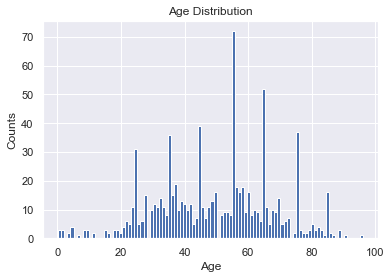

In [96]:
# Plot age distribution of the dataset
df['age'].hist(bins=100)
plt.xlabel('Age')
plt.ylabel('Counts')
plt.title('Age Distribution')

Text(0.5, 1.0, 'Gender Distribution')

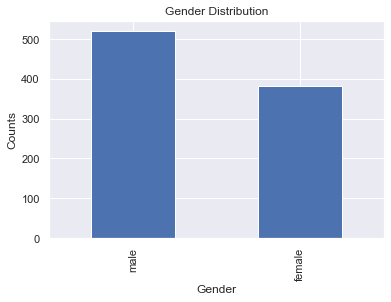

In [97]:
# plot gender distribution between gender
df['gender'].value_counts().plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Counts')
plt.title('Gender Distribution')

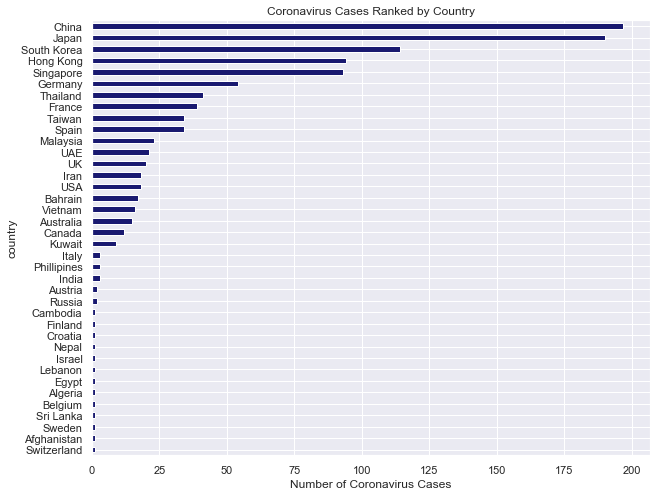

In [98]:
# Plot number of Coronavirus cases vs Countries
fig = plt.figure(figsize=(10,8))
df['country'].value_counts().sort_values().plot.barh(color='midnightblue')

plt.title('Coronavirus Cases Ranked by Country')
plt.xlabel('Number of Coronavirus Cases')
plt.ylabel('country')
plt.show()

Text(0.5, 1.0, 'Death vs Alive')

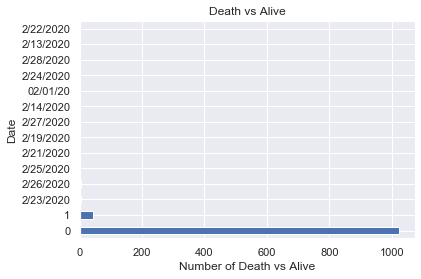

In [99]:
df['death'].value_counts().plot(kind='barh')
plt.xlabel('Number of Death vs Alive')
plt.ylabel('Date')
plt.title('Death vs Alive')

Text(0.5, 1.0, 'Recovered Distribution')

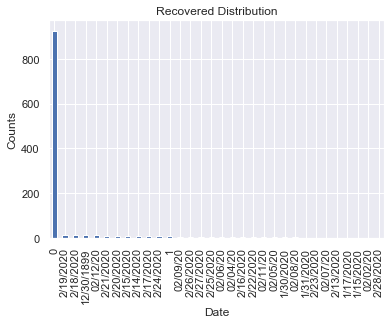

In [100]:
df['recovered'].value_counts().plot(kind='bar')
plt.xlabel('Date')
plt.ylabel('Counts')
plt.title('Recovered Distribution')

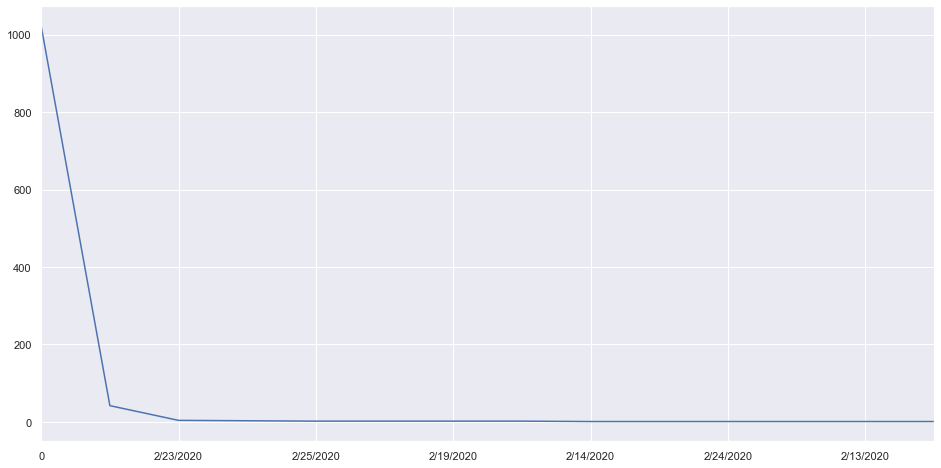

In [102]:
df['death'].value_counts().plot(figsize=(16,8))

In [8]:
df1 = pd.read_csv('time_series_covid_19_recovered.csv')
df1.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20
0,NaN,Thailand,15.0000,101.0000,0,0,0,0,2,2,...,31,31,31,31,31,33,34,34,35,35
1,NaN,Japan,36.0000,138.0000,0,0,0,0,1,1,...,43,46,76,76,76,101,118,118,118,118
2,NaN,Singapore,1.2833,103.8333,0,0,0,0,0,0,...,78,78,78,78,78,78,96,96,97,105
3,NaN,Nepal,28.1667,84.2500,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,0,0,0,...,22,22,23,24,24,24,26,26,26,35


In [12]:
df1.isnull().sum().head()

Province/State    135
Country/Region      0
Lat                 0
Long                0
1/22/20             0
dtype: int64

In [10]:
df1['Province/State'].value_counts()

Grand Princess      2
Diamond Princess    2
Polk County, GA     1
Guizhou             1
New Hampshire       1
                   ..
New York            1
Quebec              1
Saint Barthelemy    1
Oklahoma            1
Montana             1
Name: Province/State, Length: 305, dtype: int64

In [11]:
df1['Country/Region'].value_counts()

US             246
China           33
Australia        9
Canada           8
France           5
              ... 
Italy            1
Mauritania       1
Guatemala        1
Saint Lucia      1
Colombia         1
Name: Country/Region, Length: 143, dtype: int64